In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
n_task_per_file = 50
n_files = 10
base_dir = "toy_eg_stage1_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [3]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [4]:
coverage_df

,1.0,2.5,5.0,10.0,Tree val,Naive
0,1.000000,1.000000,1.000000,1.000000,0.714286,0.714286
0,1.000000,0.833333,1.000000,1.000000,1.000000,0.571429
0,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000
0,0.400000,0.571429,0.666667,0.833333,0.666667,0.666667
0,1.000000,0.833333,0.833333,1.000000,1.000000,0.600000
0,1.000000,0.833333,0.800000,0.833333,1.000000,0.833333
0,1.000000,1.000000,1.000000,1.000000,1.000000,0.833333
0,0.666667,0.833333,1.000000,0.833333,1.000000,0.714286
0,1.000000,0.833333,0.833333,0.666667,1.000000,0.666667
0,0.800000,1.000000,1.000000,0.833333,1.000000,0.833333


In [5]:
length_df

,1.0,2.5,5.0,10.0,Tree val,Naive
0,2.101828,1.498957,1.259517,1.177591,25.308622,1.258967
0,2.780595,1.372776,1.352611,1.301989,3.689239,1.268332
0,4.981442,1.370531,1.495882,1.463271,2.622564,1.153192
0,2.112737,1.528788,1.331791,1.150322,28.226204,1.186322
0,3.501492,4.725464,1.180085,1.214099,2.362458,1.074504
0,2.075186,1.928684,1.090933,2.752745,2.029370,1.174511
0,1.470478,1.493241,5.508266,1.347637,6.305012,1.155691
0,2.356888,1.645633,4.034800,1.217352,3.593908,1.264071
0,2.071232,1.284612,1.234349,1.197686,2.702792,1.170165
0,1.481534,1.314341,2.682756,1.203235,4.947740,1.189386


In [6]:
MSE_df

,1.0,2.5,5.0,10.0,Tree val,Naive
0,4.754626,5.385438,6.062667,5.715567,4.774639,4.774639
0,5.139359,5.748948,5.689308,5.676968,5.088702,5.088702
0,4.386405,4.462032,5.455791,6.438285,4.229402,4.229402
0,4.416286,4.365771,4.650772,4.643984,4.358789,4.358789
0,4.427321,5.627897,5.498672,6.121818,5.704158,5.704158
0,4.821408,5.719596,6.200399,6.775515,4.910281,4.910281
0,5.351709,5.248392,5.332590,5.561195,4.739299,4.739299
0,4.085428,4.297986,4.125738,4.329352,3.826694,3.826694
0,4.722009,4.767788,4.927773,5.277374,4.813250,4.813250
0,5.743501,5.342669,6.002551,6.356510,5.142412,5.142412


In [7]:
import seaborn as sns
def boxplots(dfs, metrics, len_lim=10, MSE_lim=10, 
             len_baseline_key=None, MSE_baseline_key=None,
             col_names=None, palette=None):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        if col_names is not None:
            df = df.copy()
            df.columns = col_names
        sns.boxplot(data=df, ax=axes[i], palette=palette)
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            axes[i].plot(j, mean, marker='v', color='#40E0D0', markersize=10)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
            axes[i].axhline(y=0.9, linestyle='dotted', color='grey')
        elif metric == "Length":
            axes[i].set_ylim(0,len_lim)
            if len_baseline_key:
                axes[i].axhline(y=means[len_baseline_key], linestyle='dotted', color='grey')
        elif metric == "MSE":
            axes[i].set_ylim(0,MSE_lim)
            if MSE_baseline_key:
                axes[i].axhline(y=means[MSE_baseline_key], linestyle='dotted', color='grey')
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 RRT(1)         0.886667
RRT(2.5)       0.873810
RRT(5)         0.913333
RRT(10)        0.900000
Tree-values    0.938095
Naive          0.693333
dtype: float64
Length :
 RRT(1)         2.493341
RRT(2.5)       1.816303
RRT(5)         2.117099
RRT(10)        1.402593
Tree-values    8.178791
Naive          1.189514
dtype: float64
MSE :
 RRT(1)         4.784805
RRT(2.5)       5.096652
RRT(5)         5.394626
RRT(10)        5.689657
Tree-values    4.758763
Naive          4.758763
dtype: float64


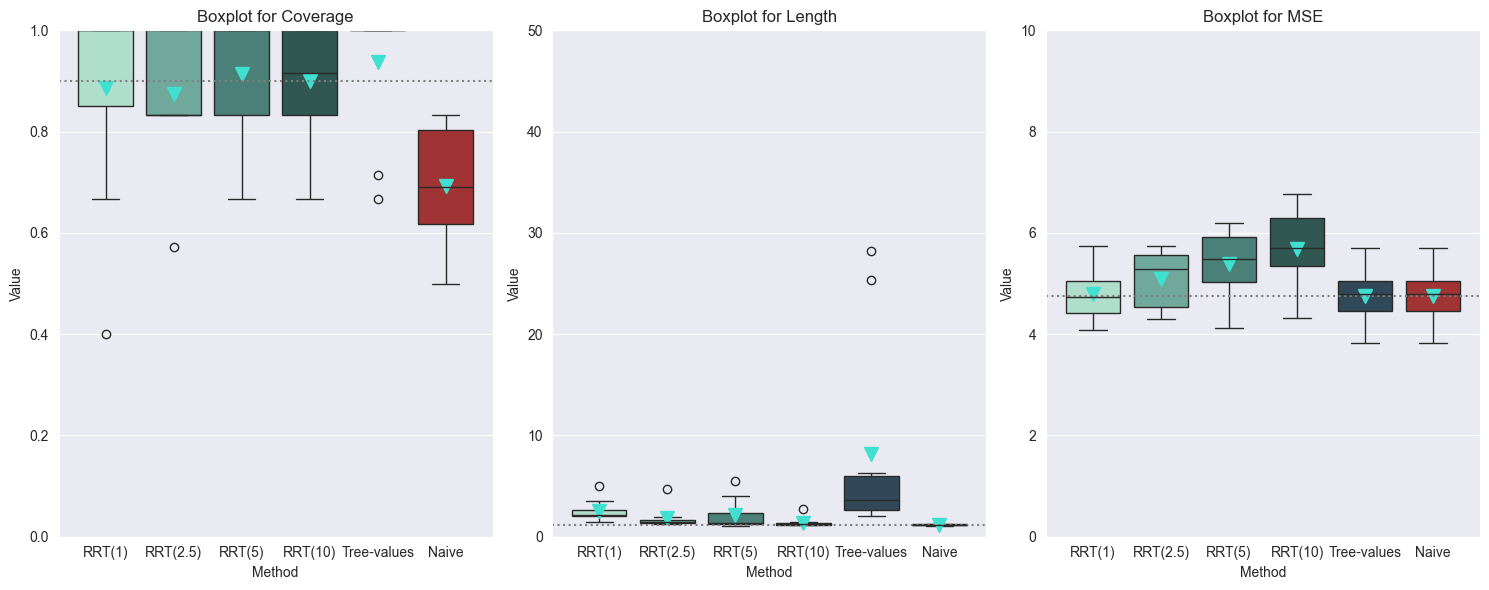

In [8]:
boxplots(dfs=[coverage_df, 
              length_df, 
              MSE_df], 
         len_lim=50,
         len_baseline_key="Naive",
         MSE_baseline_key="Naive",
         metrics=["Coverage", "Length", "MSE"],
         col_names=["RRT(1)", "RRT(2.5)", "RRT(5)", "RRT(10)",
                    "Tree-values", "Naive"], 
         palette=["#A8E6CF", "#66B2A2", "#41897D", "#2A5D57", "#2A4A5D", "#B22222"])

In [9]:
# TODO: Case 1 with 1, 5, 10